**АНАЛИЗ ДАННЫХ ДЛЯ УДЕРЖАНИЯ КЛИЕНТОВ СЕТИ ФИТНЕС-ЦЕНТРОВ «Культурист-датасаентист»**

**ШАГ 1. ЗАГРУЗИТЬ ДАННЫЕ**

**ШАГ 2. ПРОВЕСТИ ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ(EDA)**

**2.1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());**

**2.2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());**

**2.3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);**

**2.4. Постройте матрицу корреляций и отобразите её.**

**ШАГ 3. ПОСТРОИТЬ МОДЕЛЬ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ**

**3.1. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().**

**3.2. Обучите модель на train-выборке двумя способами:логистической регрессией, случайным лесом.**

**3.3. Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?**

**ШАГ 4. СДЕЛАТЬ КЛАСТЕРИЗАЦИЮ КЛИЕНТОВ**

**4.1. Стандартизируйте данные.**

**4.2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.**

**4.3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).**

**4.4. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?**

**4.5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?**

**4.6. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?**

**ШАГ 5. СФОРМУЛИРОВАТЬ ВЫВОДЫ И СДЕЛАТЬ БОЗОВЫЕ РЕКОМЕНДАЦИИ ПО РАБОТЕ С КЛИЕНТАМИ**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

**ШАГ 1. ЗАГРУЗИТЬ ДАННЫЕ**

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


*Переведем название столбцов в нижний регистр*

In [3]:
df.columns = df.columns.str.lower()
df.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


**ШАГ 2. ПРОВЕСТИ ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ(EDA)**

**2.1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

*Пропусков нет*

In [5]:
df.duplicated().sum()

0

*Дубликатов нет*

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


***Выбросов не наблюдаем, видна равномерность в данных, стандартное отклоенение близко к средним значениям***

**2.2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());**

In [7]:
df.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**2.3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);**

In [8]:
#for column in df.columns:
    #plt.figure(figsize=(7, 7))
    #df.groupby('churn')[column]
    #sns.distplot(df[column])
    #plt.title(column)
    #plt.show()

In [9]:
#for column in df.columns:
     #plt.figure(figsize=(7, 7))
     #sns.countplot(x = df[column], hue='churn', data=df)
     #plt.title(column)
     #plt.show()

***Распределение нормальное***

***1. По gender - доли оттока и для мужчин и для женщин практически одинаковы;***

***2. По near_location - доля живущих ближе к фитнес-центрам больше , как и польше доля оттока по ним;***

***3. По partner - доля участвующих в программах немного выше, но при этом о доля их оттка меньше;*** 

***4. По promo_friends - доля участников промо акции гараздо меньше, как и их доля в оттоке;*** 

***5. По phone - логичное распределение, клиентов, которые оставили номер телефона, в разы больше;*** 

***6. По contract_period - явные лидеры оттока, это клиенты, которые купили клубную карту на 1 месяц. Видим тенденцию, чем больше период действия клубной карты, тем меньше отток;*** 

***7. По group_visits - отток клиентов, которые ходят на групповые занятия в разы меньше;*** 

***8. По age - клиенты от 18 до 25 лет включительно чаще прекращают посещение фитнес-центра;*** 

***9. По month_to_end_contract - явно видно, что основной отток клиентов происходит, когда до окончания действия карты остается 1 месяц;*** 

***10. По lifetime - как и по данным contract_period, отток клиентов с посещениями 1-2 месяца;*** 

**2.4. Постройте матрицу корреляций и отобразите её.**

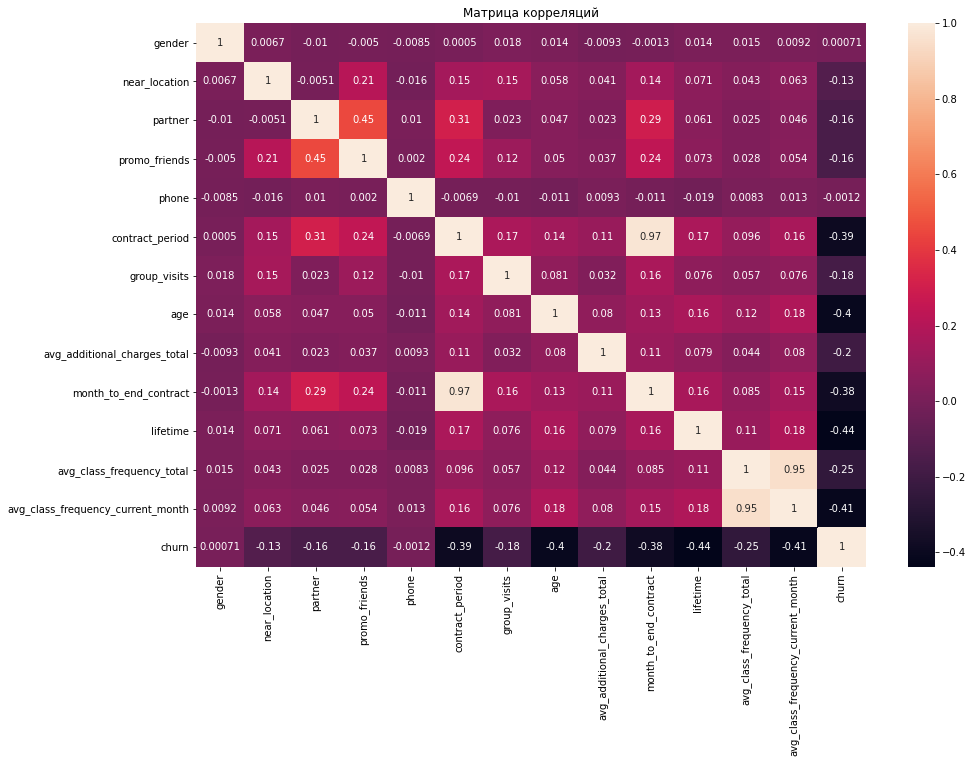

In [10]:
cm = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, square=False)
plt.title('Матрица корреляций')
plt.show()

***В основном коррекляция слабая между признаками.*** 

***Сильная коррекляция у следующих признаков:*** 

***1. contract_period и month_to_end_contract - они логично коррелируют период контракта и окончание контракта***

***2. avg_class_frequency_current_month и avg_class_frequency_total - тоже логично средняя частота посещейни за месяц и за весь период достаточно сильно кррелируют между собой.*** 

**ШАГ 3. ПОСТРОИТЬ МОДЕЛЬ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ**

**3.1. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().**

In [11]:
X = df.drop(['churn','contract_period', 'avg_class_frequency_current_month'], axis=1)
y = df['churn'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

**3.2. Обучите модель на train-выборке двумя способами:логистической регрессией, случайным лесом.**

**Логическая регрессия**

In [14]:
model_l = LogisticRegression(solver='liblinear',random_state = 0)

In [15]:
model_l.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
predictions_l = model_l.predict(X_test_st)
probabilities_l =  model_l.predict_proba(X_test_st)[:,1]

**Случайный лес**

In [17]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

**3.3. Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?**

In [18]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, predictions_l)))
print('Precision: {:.3f}'.format(precision_score(y_test, predictions_l)))
print('Recall: {:.3f}'.format(recall_score(y_test, predictions_l)))

Accuracy: 0.902
Precision: 0.813
Recall: 0.821


In [19]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.901
Precision: 0.831
Recall: 0.788


***Обе модели показывают очень высокие показатели по Accuracy, Precision и Recall.*** 

***Но незначительно выигрывает модель Логической регрессии.***

**ШАГ 4. СДЕЛАТЬ КЛАСТЕРИЗАЦИЮ КЛИЕНТОВ**

**4.1. Стандартизируйте данные.**

In [20]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

**4.2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.**

In [21]:
linked = linkage(X_sc, method = 'ward')

In [22]:
#plt.figure(figsize=(15, 10))  
#dendrogram(linked, orientation = 'top')
#plt.title('Кластеризация')
#plt.show()

***Согласно дендрограмме можно выделить 5 кластеров***

**4.3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).**

In [32]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)
df['cluster'] = labels
df.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0,2
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0,4
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,3
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0,2


In [33]:
df.groupby(['cluster'])['age'].count()

cluster
0    1001
1     557
2     898
3    1158
4     386
Name: age, dtype: int64

**4.4. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?**

In [34]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.498501,0.500898,0.521158,0.512090,0.523316
near_location,0.995005,0.000000,0.995546,1.000000,0.862694
partner,0.889111,0.488330,0.417595,0.196891,0.471503
promo_friends,1.000000,0.077199,0.011136,0.053541,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.844156,2.978456,6.726058,2.012953,4.777202
group_visits,0.519481,0.231598,0.546771,0.297064,0.427461
age,29.543457,28.685817,30.805122,27.818653,29.297927
avg_additional_charges_total,152.139417,137.277472,177.103564,124.625600,144.208179
month_to_end_contract,6.265734,2.804309,6.162584,1.898964,4.466321


***Можно заметить:*** 

***1. По кластеру 0 - partner выская доля, самая высокая из всех кластеров среднее promo_friends, как и contract_period, month_to_end_contract***

***2. По кластеру 1 - среднее phone равно 0***

***3. По кластеру 2 - среднее near_location равно 0, самое низкое среднее group_visits и promo_friends***

***4. По кластеру 3 - самые низкие показатели средних значений по параметрам  avg_class_frequency_total и avg_class_frequency_current_month***

***5. По кластеру 4 - самые выские средные по параметрам avg_class_frequency_total и avg_class_frequency_current_month***


**4.5. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?**

In [35]:
#for column in df.columns:
#    plt.figure(figsize=(15, 15))
#    sns.countplot(x = df[column], hue='cluster', data=df)
#    plt.title(column)
#    plt.show()

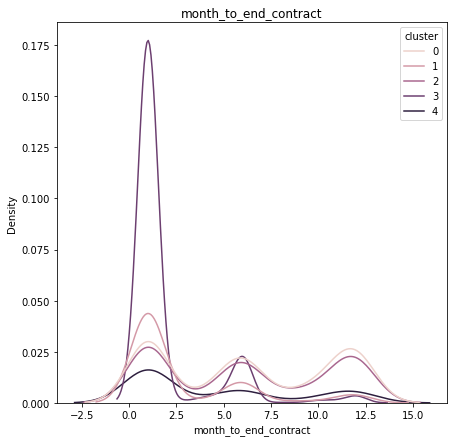

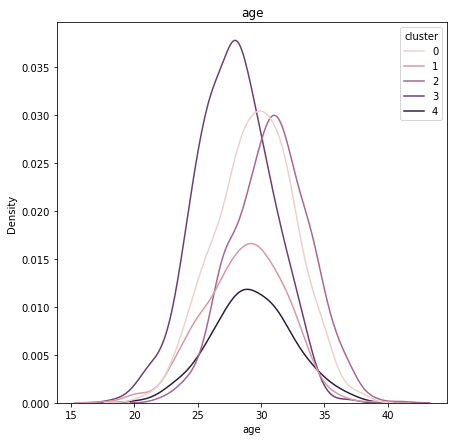

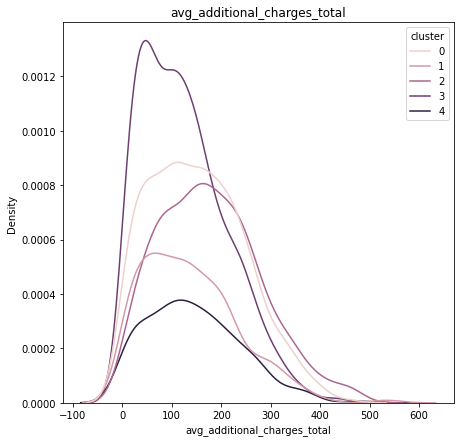

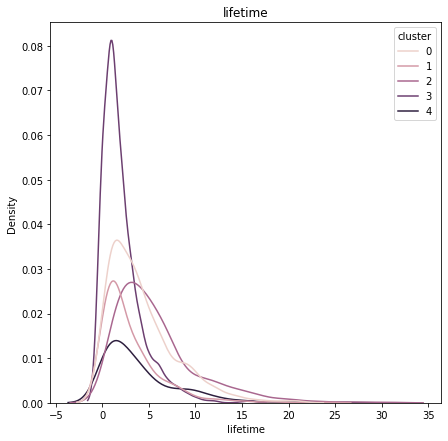

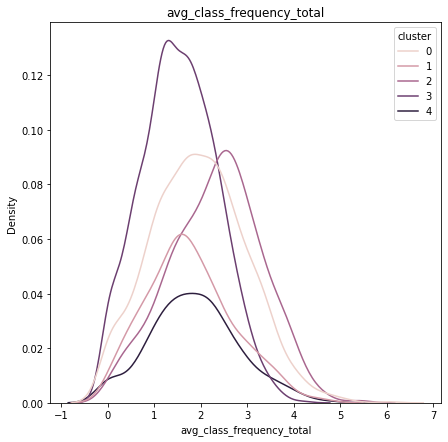

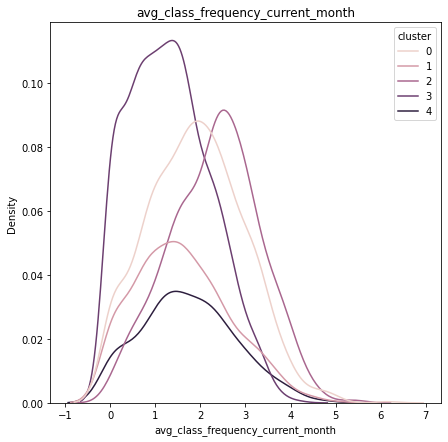

In [46]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.kdeplot(data = df, x = df[column], hue = 'cluster')
    plt.title(column)
    plt.show()

***1. По gender - выделяется кластер 3, как по мужчинам, так и по женщинам.*** 

***2. По near_location - также, выделяется 3 кластер по количеству клиентов, которые живут близко.*** 

***3. По partner - без партнерских программ выделяется кластер 3, а с партнерскими программами кластер 0.***

***4. По promo_friends - аналогиная ситуация, как и с partner.***

***5. По phone - как ранее описывал, только один кластер без номеров клиентов.***

***6. По contract_period - кластер 3 выделяется по клубным картам на 1 месяц, кластер 4 на 6 месяцев и кластер 0 на 12 месяцев.*** 

***7. По group_visits - большинство клиентов, которые не ходят на групповые занятия состоят в кластере 3, а с групповыми кластер 0.*** 

***8. По age - большинство клиентов до 30 входят в 3 кластер, после 30 в 0 кластер.*** 

***9. По month_to_end_contract - аналогично contract_period***

***10. По lifetime - до 4 месяцев лидирует кластер 3, с 4 месяца по 6 лидирует кластер 0*** 

**4.6. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?**

In [47]:
df.query('churn==1').groupby('cluster')['churn'].count() / df.query('churn==1')['churn'].count()

cluster
0    0.125353
1    0.211122
2    0.014138
3    0.552309
4    0.097078
Name: churn, dtype: float64

***Наибольший отток из 3 и 2 кластеров, самые надежные 0 и 4 кластеры***

**ШАГ 5. СФОРМУЛИРОВАТЬ ВЫВОДЫ И СДЕЛАТЬ БОЗОВЫЕ РЕКОМЕНДАЦИИ ПО РАБОТЕ С КЛИЕНТАМИ**

1. ПРЕДОБРАБОТКА ДАННЫХ

 Все столбцы перевели в нижний регистр, остальное не трогали. 

2. КОРРЕЛЯЦИЯ

Выявили сильную корреляцию у следующих признаков:

contract_period и month_to_end_contract

avg_class_frequency_current_month и avg_class_frequency_total

3. ПРОГНОЗИРОВАНИЕ

Применили 2 модели прогнозирования Логистическая регрессия и Случайный лес. 
Обе модели отработали эффективно с высокими показателями Accuracy, Precision, Recall. 
При этом незначительно вырвалась вперед модель Логистической регрессии. 

4. КЛАСТЕРИЗАЦИЯ

Согласно дендрограмме было принято решение распределить клиентов на 5 кластеров:


0 - самый надежный кластер с минимальным оттоком. В основном в кластер входят клиенты, которые купили клубные карты на 12 месяцев, которые ходят на групповые занятия. 

1 - отток составляет 10%, и является кластером без телефоных номеров. 

2 - топ 2 по оттоку клиентов. Клиенты находятся на большом расстоянии от фитнес-центра и не пользуются групповыми занятиями. 

3 - топ 1 по оттоку клиентов, самый ненадежный кластер. Клиенты из этого кластера имеют клубную карту на 1-2 месяца. Пришли не по промо акции или партнерской программе. В осноном молодой контингент.  

4 - можно отнести к надежному кластеру с оттоком 5,37%.

РЕКОМЕНДАЦИИ

1. Кластеры показали, что отток клиентов, которые пришли через партнерские программы и по промо-акции, много меньше. В связи с этим, надо сделать упор на привлечение клиентов именно через эти каналы. 
2. Также, согласно проведенной работе, надежными клиентами явлются те, кто купил карту на 12 месяцев. Надо рассмотреть улучшение тарифа на карту 12 месяцев, возможно ввести дополнительные "плюшким" такием клиентам. 
3. Развивать программы групповых занятий, что может удержать клиента в фитнес-центре.
